# PCA (Principal Component Analysis)

*   Unsupervised Learning Technique
*   Generally used for dimensionality reduction
*   Also useful in applications such as
    *   visualization of high-dimensional data,
    *   noise filtering
    *   feature extraction and feature engineering
*   PCA performs linear dimensionality reduction using SVD (Singular Value Decomposition) of the data to project it to a lower dimensional space. Source: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

Resources:
*   https://www.youtube.com/watch?v=FgakZw6K1QQ
*   https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
*   https://github.com/StatQuest/pca_demo/blob/master/pca_demo.py
*   Plot 3D data: https://jakevdp.github.io/mpl_tutorial/tutorial_pages/tut5.html
*   Plotting in 3D: https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html








In [ ]:
# Import necessary packages
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA, KernelPCA
from sklearn import preprocessing
from sklearn import decomposition
from sklearn import datasets

# Example using Iris dataset



**Iris Dataset**

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.
Predicted attribute: class of iris plant.
Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
*   Iris Setosa
*   Iris Versicolour
*   Iris Virginica

In [ ]:
#Load iris data from sklearn.dataset module
iris = datasets.load_iris()
X = iris.data
y = iris.target
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']
iris_species = ["Setosa", "Versicolour", "Virginica"]

dataset = pd.DataFrame(X, columns=names)
dataset
#y

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


A scatter plot between the sepal length and the sepal width is plotted to visualise the iris dataset.

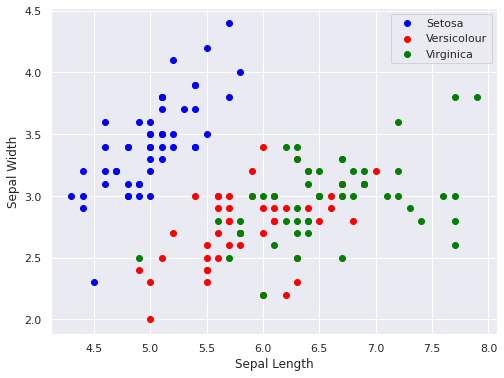

In [ ]:
colors = ['blue', 'red', 'green']
fig = plt.figure(figsize = (8,6))
for i in range(len(colors)):
    px = X[:,0][y==i]
    py = X[:,1][y==i]
    plt.scatter(px, py, c=colors[i])
plt.legend(iris_species)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()
plt.close(fig)

We see that the separation between the blue dots(setosa) and red(versicolor) and green dots(virginica) is quite clear, while separating red dots from green dots seems a very difficult task given the two features available.

We visualise the data on different features: petal width and petal length.

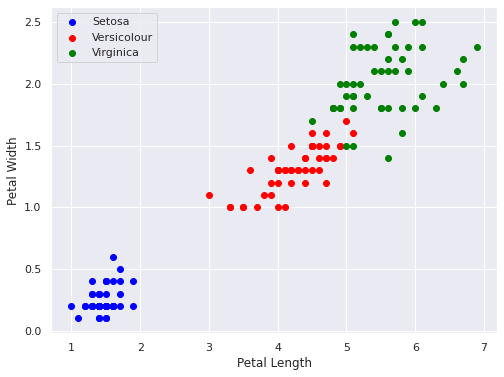

In [ ]:
fig = plt.figure(figsize = (8,6))
for i in range(len(colors)):
    px = X[:,2][y==i]
    py = X[:,3][y==i]
    plt.scatter(px, py, c=colors[i])
plt.legend(iris_species)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()
plt.close(fig)

In this case, the decision boundary between the green and the red dots can be easily determined.

Therefore, using the important features for training is a good choice. We use dimensionality reduction to reduce our input dimension (no. of features) so as to extract the important features of the input.

# Dimensionality Reduction

We will use PCA (Principal Component Analysis) for dimensionality reduction.


PCA API reference: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

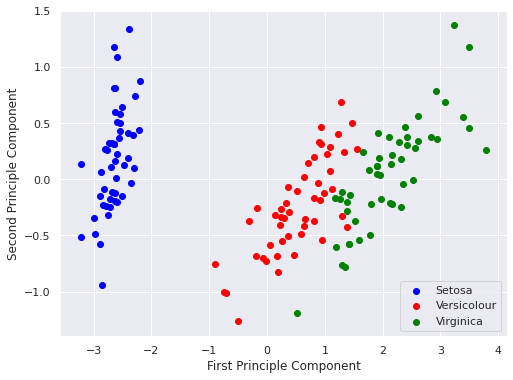

In [ ]:
# Visualizing the principal components using PCA

# Linear PCA
est = PCA(n_components=2)
x_pca = est.fit_transform(X)
#print(x_pca.shape)
plt.figure(figsize=[8, 6])
for i in range(len(colors)):
    px = x_pca[:,0][y==i]
    py = x_pca[:,1][y==i]
    plt.scatter(px, py, c=colors[i])
plt.legend(iris_species)
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')
plt.show()
plt.close()

Kernel PCA API reference : https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA

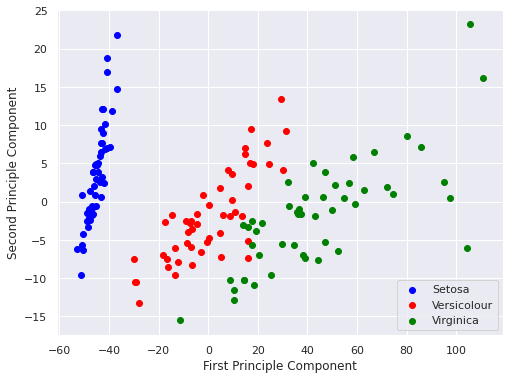

In [ ]:
# Visualizing the principal components using different Kernel PCA

# Polynomial Kernel
est = KernelPCA(n_components=2, kernel='poly', degree=3)
x_pca = est.fit_transform(X)

plt.figure(figsize=[8, 6])
for i in range(len(colors)):
    px = x_pca[:,0][y==i]
    py = x_pca[:,1][y==i]
    plt.scatter(px, py, c=colors[i])
plt.legend(iris_species)
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')
plt.show()
plt.close()

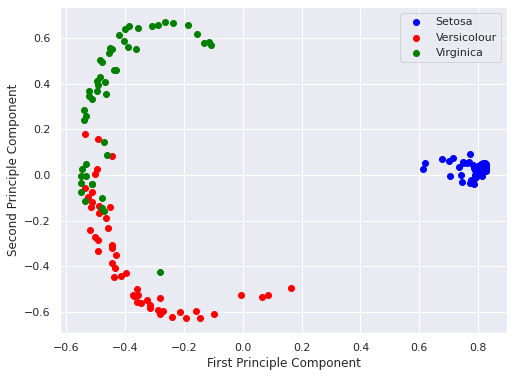

In [ ]:
# Gaussian Kernel
est = KernelPCA(n_components=2, kernel='rbf')
x_pca = est.fit_transform(X)

plt.figure(figsize=[8, 6])
for i in range(len(colors)):
    px = x_pca[:,0][y==i]
    py = x_pca[:,1][y==i]
    plt.scatter(px, py, c=colors[i])
plt.legend(iris_species)
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')
plt.show()
plt.close()

Automatically created module for IPython interactive environment


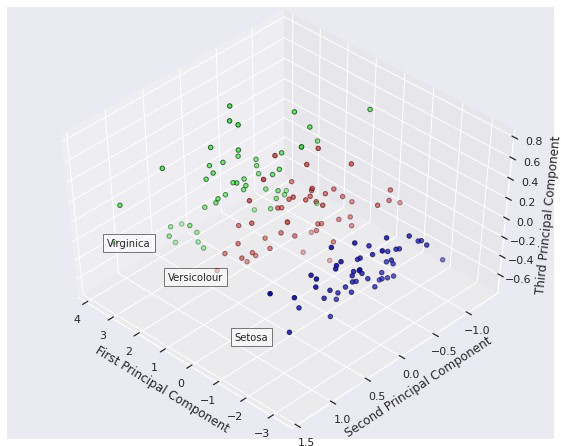

In [ ]:
# PCA in 3 dimensions

print(__doc__)

# Code taken from: https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html
# Code source: Gaël Varoquaux
# License: BSD 3 clause

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]

fig = plt.figure(1, figsize=(8,6))
plt.clf()  # Clear current figure
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla() # Clear current axes
pca = PCA(n_components=3)
x_pca3D = pca.fit_transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(x_pca3D[y == label, 0].mean(),
              x_pca3D[y == label, 1].mean() + 1.5,
              x_pca3D[y == label, 2].mean(),
              name, horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='black', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y_new = np.choose(y, [0, 1, 2]).astype(float)
ax.scatter(x_pca3D[:, 0], x_pca3D[:, 1], x_pca3D[:, 2], c=y_new, cmap='brg',
           edgecolor='k')

ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')

plt.show()

# PCA for visualization

**Hand-written digits**
Data consists of 8×8 pixel images, meaning that they are 64-dimensional. 

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

To gain some intuition into the relationships between these points, we can use PCA to project them to a more manageable number of dimensions, say two:

In [ ]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


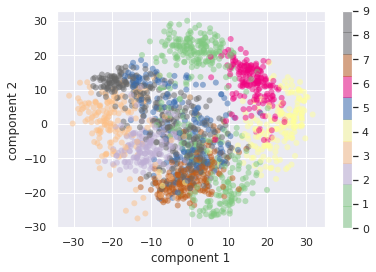

In [ ]:
#plot the dataset
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

The full data is a 64-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance.
Essentially, we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits in two dimensions, and have done this in an unsupervised manner—that is, without reference to the labels.

### Choosing the number of components

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data.
This can be determined by looking at the cumulative *explained variance ratio* as a function of the number of components:

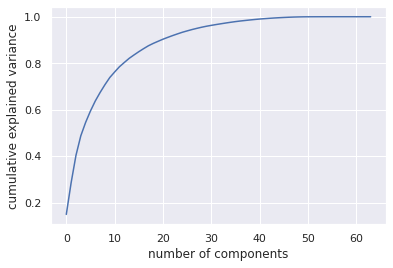

In [ ]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

This curve quantifies how much of the total, 64-dimensional variance is contained within the first  N  components. For example, we see that with the digits the first 10 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the variance.

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance. Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.



#PCA as Noise Filtering

PCA can also be used as a filtering approach for noisy data. The idea is this: any components with variance much larger than the effect of the noise should be relatively unaffected by the noise. So if you reconstruct the data using just the largest subset of principal components, you should be preferentially keeping the signal and throwing out the noise.

Let's see how this looks with the digits data. First we will plot several of the input noise-free data:

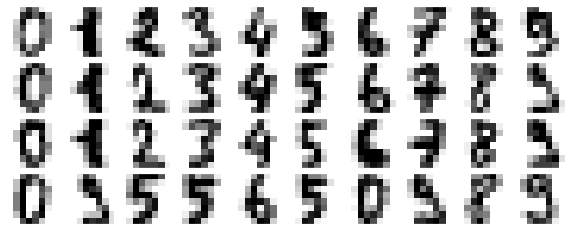

In [ ]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

Now lets add some random noise to create a noisy dataset, and re-plot it:

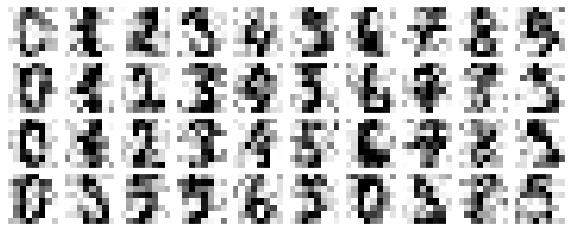

In [ ]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

It's clear by eye that the images are noisy, and contain spurious pixels.
Let's train a PCA on the noisy data, requesting that the projection preserve 50% of the variance:

In [ ]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

Here 50% of the variance amounts to 12 principal components.
Now we compute these components, and then use the inverse of the transform to reconstruct the filtered digits:

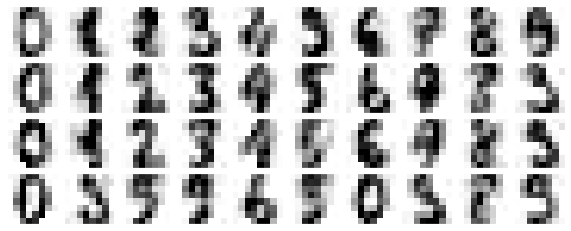

In [ ]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

This signal preserving/noise filtering property makes PCA a very useful feature selection routine—for example, rather than training a classifier on very high-dimensional data, you might instead train the classifier on the lower-dimensional representation, which will automatically serve to filter out random noise in the inputs.